In [1]:
import numpy as np
import pandas as pd

In [368]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.metrics import precision_score, confusion_matrix

import math

import warnings
warnings.filterwarnings("ignore")

In [369]:
def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="real IBM stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title("IBM stock price prediction")
    plt.xlabel("time")
    plt.ylabel("IBM stock price")
    plt.legend()
    plt.show()

In [370]:
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error is : {}.".format(rmse))

In [371]:
data = pd.read_csv('dataset/stocknet-dataset-master/price/raw/GOOG.csv')

In [372]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-09-04,340.996857,341.221008,335.492493,339.248413,339.248413,3793200
1,2012-09-05,338.730347,341.968231,338.301971,339.089020,339.089020,3429100
2,2012-09-06,341.699219,348.638214,341.086517,348.394135,348.394135,6109700
3,2012-09-07,348.693024,354.795135,347.532349,351.756531,351.756531,6490100
4,2012-09-10,353.554779,355.074097,347.891022,349.076569,349.076569,5139100
...,...,...,...,...,...,...,...
1253,2017-08-28,916.000000,919.244995,911.869995,913.809998,913.809998,1086500
1254,2017-08-29,905.099976,923.330017,905.000000,921.289978,921.289978,1185600
1255,2017-08-30,920.049988,930.818970,919.650024,929.570007,929.570007,1301200
1256,2017-08-31,931.760010,941.979980,931.760010,939.330017,939.330017,1582600


In [373]:
train = data.iloc[:1000, 4:5]
test = data.iloc[1000:, 4:5]
test.reset_index(inplace=True)
del test['index']

In [374]:
test

,Close
0,769.409973
1,769.539978
2,772.150024
3,769.090027
4,767.049988
...,...
253,913.809998
254,921.289978
255,929.570007
256,939.330017


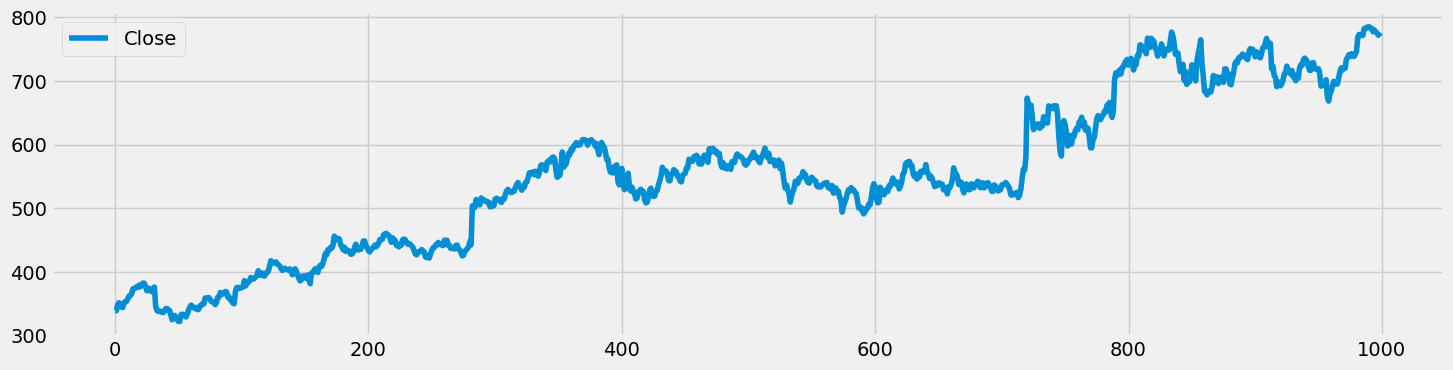

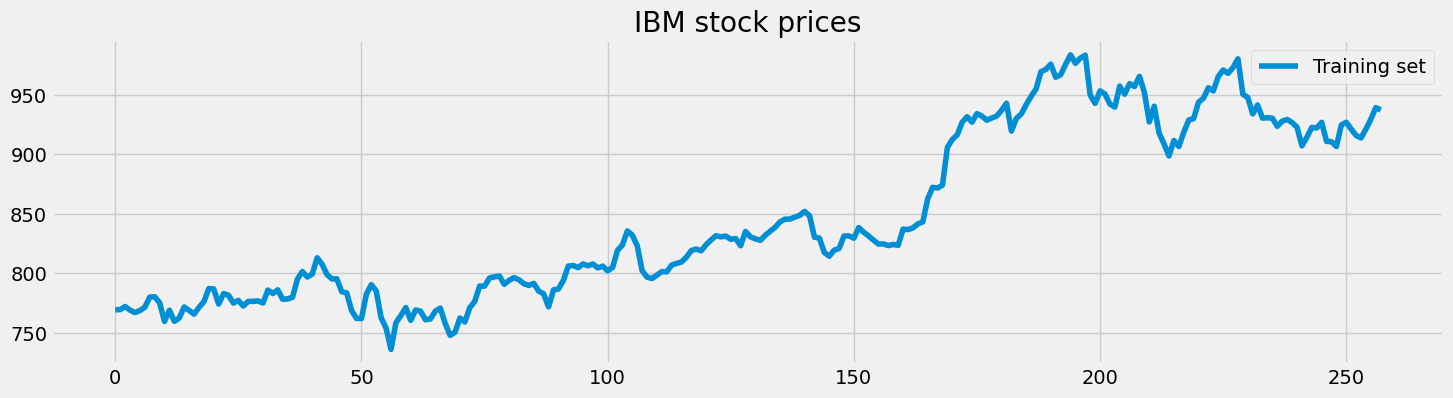

In [375]:
train.plot(figsize=(16,4))
test.plot(figsize=(16,4))
plt.legend(["Training set", "Test set"])
plt.title("IBM stock prices")
plt.show()

In [376]:
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [377]:
x_train = []
y_train = []

for i in range(60,1000):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [378]:
x_train[0]

array([3.64712328e-02, 3.61265757e-02, 5.62471200e-02, 6.35176629e-02,
       5.77227539e-02, 4.84810686e-02, 4.70701029e-02, 6.33991467e-02,
       6.73199187e-02, 6.76429981e-02, 7.65831147e-02, 8.65141164e-02,
       8.71819177e-02, 9.35046033e-02, 1.10081435e-01, 1.09844469e-01,
       1.14476136e-01, 1.17750548e-01, 1.15596290e-01, 1.23437698e-01,
       1.18278324e-01, 1.24213260e-01, 1.30191222e-01, 1.29760384e-01,
       1.19193849e-01, 1.04383529e-01, 1.04889726e-01, 1.12343389e-01,
       1.05094423e-01, 1.01033689e-01, 1.05040575e-01, 1.16662664e-01,
       5.15078271e-02, 3.72790632e-02, 3.39184700e-02, 3.57280057e-02,
       3.24428339e-02, 3.29382754e-02, 3.01270365e-02, 3.56741577e-02,
       4.35263231e-02, 4.38818047e-02, 3.85393116e-02, 3.72037045e-02,
       2.14777290e-02, 5.50409985e-03, 1.70723400e-02, 2.01637018e-02,
       1.27853981e-02, 5.78415361e-03, 8.61810320e-05, 0.00000000e+00,
       2.26517964e-02, 2.45475131e-02, 2.01313667e-02, 2.23933182e-02,
      

In [379]:
y_train[0]

0.05513765380798352

In [380]:
len(x_train)

940

In [381]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [384]:
dataset_total = pd.concat((data['Close'][:1000], data['Close'][1000:]), axis=0)
print(dataset_total.shape)

inputs = dataset_total[len(dataset_total)-len(test)-60 : ].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)
print(inputs.shape)

(1258,)
(318,)
(318, 1)
(318, 1)


In [385]:
x_test = []
for i in range(60, len(test)+60):
    x_test.append(inputs[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [386]:
predicted = regressor.predict(x_test)
predicted = sc.inverse_transform(predicted)

9/9 [==============================] - 1s 7ms/step


In [403]:
import seaborn as sns

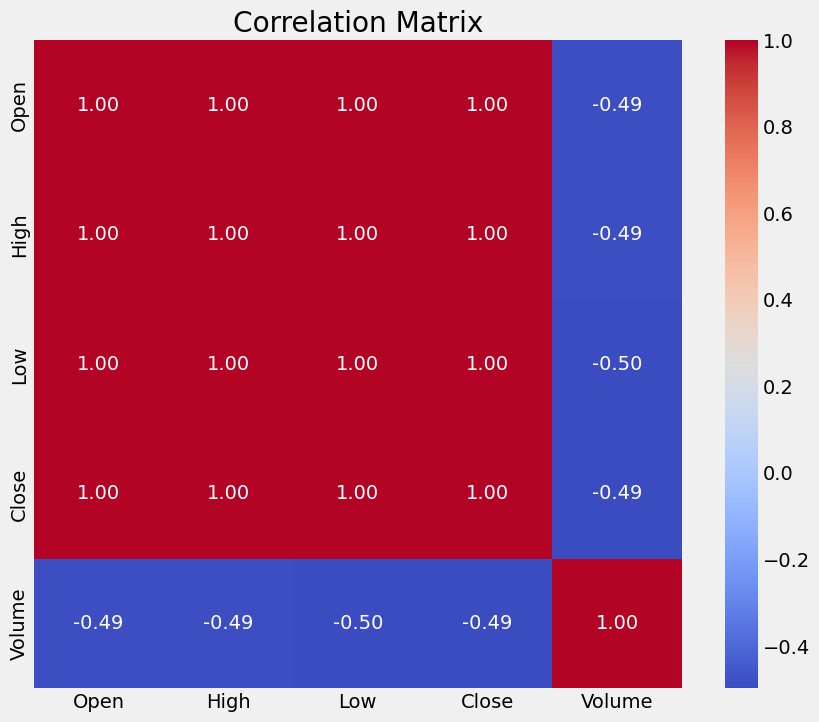

In [404]:
numerical_features = ['Open', 'High', 'Low', 'Close', 'Volume']
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix")
plt.show()

In [405]:
df_sentiment=pd.read_csv('sentiment/stock_data.csv')

In [406]:
# clean_text function made by chatGPT
def clean_text(Text):
    import re

    Text = re.sub(r'http\S+|www\S+|https\S+', '', Text, flags=re.MULTILINE)

    Text = re.sub(r'\@w+|\#', '', Text)

    Text = re.sub(r'\d+', '', Text)

    Text = Text.lower()

    from nltk.corpus import stopwords
    Text = ' '.join(word for word in Text.split())
    return Text

df_sentiment['Text'] = df_sentiment['Text'].apply(clean_text)

In [407]:
df_sentiment['Text'] = df_sentiment['Text'].fillna('').astype(str)
df_sentiment['Text'] = df_sentiment['Text'].apply(clean_text)

In [408]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(df_sentiment['Text'],df_sentiment['Sentiment'],test_size=0.2,random_state=42)

In [409]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_tf = vectorizer.fit_transform(x_train)
x_test_tf = vectorizer.transform(x_test)

In [410]:
import pandas as pd
import json
from pandas import json_normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

vectorizer = TfidfVectorizer()
x_train_tf = vectorizer.fit_transform(x_train)

x_train_tf, x_val_tf, y_train, y_val = train_test_split(x_train_tf, y_train, test_size=0.2, random_state=42)

model = Sequential([
    Dense(128, activation='relu', input_dim=x_train_tf.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='tanh')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

x_train_tf_dense = x_train_tf.toarray()
x_val_tf_dense = x_val_tf.toarray()

model.fit(x_train_tf_dense, y_train, epochs=50, batch_size=32, validation_data=(x_val_tf_dense, y_val))

Epoch 1/50
116/116 [==============================] - 1s 4ms/step - loss: 0.8529 - mae: 0.8753 - val_loss: 0.7039 - val_mae: 0.7671
Epoch 2/50
116/116 [==============================] - 0s 4ms/step - loss: 0.4617 - mae: 0.5202 - val_loss: 0.6067 - val_mae: 0.5701
Epoch 3/50
116/116 [==============================] - 0s 3ms/step - loss: 0.2015 - mae: 0.2664 - val_loss: 0.6404 - val_mae: 0.5178
Epoch 4/50
116/116 [==============================] - 0s 4ms/step - loss: 0.0977 - mae: 0.1461 - val_loss: 0.6712 - val_mae: 0.5162
Epoch 5/50
116/116 [==============================] - 0s 4ms/step - loss: 0.0523 - mae: 0.0910 - val_loss: 0.6953 - val_mae: 0.5073
Epoch 6/50
116/116 [==============================] - 0s 4ms/step - loss: 0.0282 - mae: 0.0580 - val_loss: 0.7167 - val_mae: 0.5032
Epoch 7/50
116/116 [==============================] - 0s 4ms/step - loss: 0.0213 - mae: 0.0438 - val_loss: 0.7205 - val_mae: 0.4957
Epoch 8/50
116/116 [==============================] - 0s 4ms/step - loss: 0.

In [411]:
import os
import json
import pandas as pd
from pandas import json_normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime

def clean_text(text):
    return text.lower()

folder_path = 'dataset/stocknet-dataset-master/tweet/raw/GOOG/'

results = []

start_date = datetime(2014, 1, 1)
end_date = datetime(2016, 12, 31)
all_dates = pd.date_range(start=start_date, end=end_date).to_frame(index=False, name='date')

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    try:
        file_date = datetime.strptime(filename.split('.')[0], '%Y-%m-%d').date()
    except ValueError:
        print(f"Skipping invalid file: {filename}")
        continue

    try:
        df_tweet = pd.read_csv(file_path, delimiter='\t', header=None, names=['json_content'])
        df_tweet['parsed'] = df_tweet['json_content'].apply(json.loads)
        df_normalized = json_normalize(df_tweet['parsed'])

        df_normalized['text'] = df_normalized['text'].apply(clean_text)
        df_normalized['text'] = df_normalized['text'].fillna('').astype(str)

        df_tf = vectorizer.transform(df_normalized['text'])

        df_tf_dense = df_tf.toarray()

        y_pred = model.predict(df_tf_dense, verbose=0)
        y_pred_label = ((sum(y_pred > 0).astype(int) / len(y_pred)) - 0.5) * 2

        results.append({'date': file_date, 'sentiment_label': y_pred_label})

    except Exception as e:
        print(f"Error processing {filename}: {e}")

results_df = pd.DataFrame(results)

results_df['date'] = pd.to_datetime(results_df['date'])
merged_df = pd.merge(all_dates, results_df, on='date', how='left')

merged_df['sentiment_label'] = merged_df['sentiment_label'].fillna(0)

merged_df = merged_df.sort_values(by='date').reset_index(drop=True)

           date        sentiment_label
0    2014-01-01  [-0.4285714285714286]
1    2014-01-02                  [1.0]
2    2014-01-03   [0.7142857142857142]
3    2014-01-04                 [-1.0]
4    2014-01-05                  [1.0]
...         ...                    ...
1091 2016-12-27                      0
1092 2016-12-28                      0
1093 2016-12-29                      0
1094 2016-12-30                      0
1095 2016-12-31                      0

[1096 rows x 2 columns]


In [412]:
df['Date'] = pd.to_datetime(df['Date'])
merged_df['date'] = pd.to_datetime(merged_df['date'])

df = pd.merge(df, merged_df[['date', 'sentiment_label']], left_on='Date', right_on='date', how='left')

df = df.drop(columns=['date'])

df['sentiment_label'] = df['sentiment_label'].fillna(0)

In [413]:
df['sentiment_label'] = df['sentiment_label'].apply(lambda x: x[0] if isinstance(x, (list, np.ndarray)) else x)

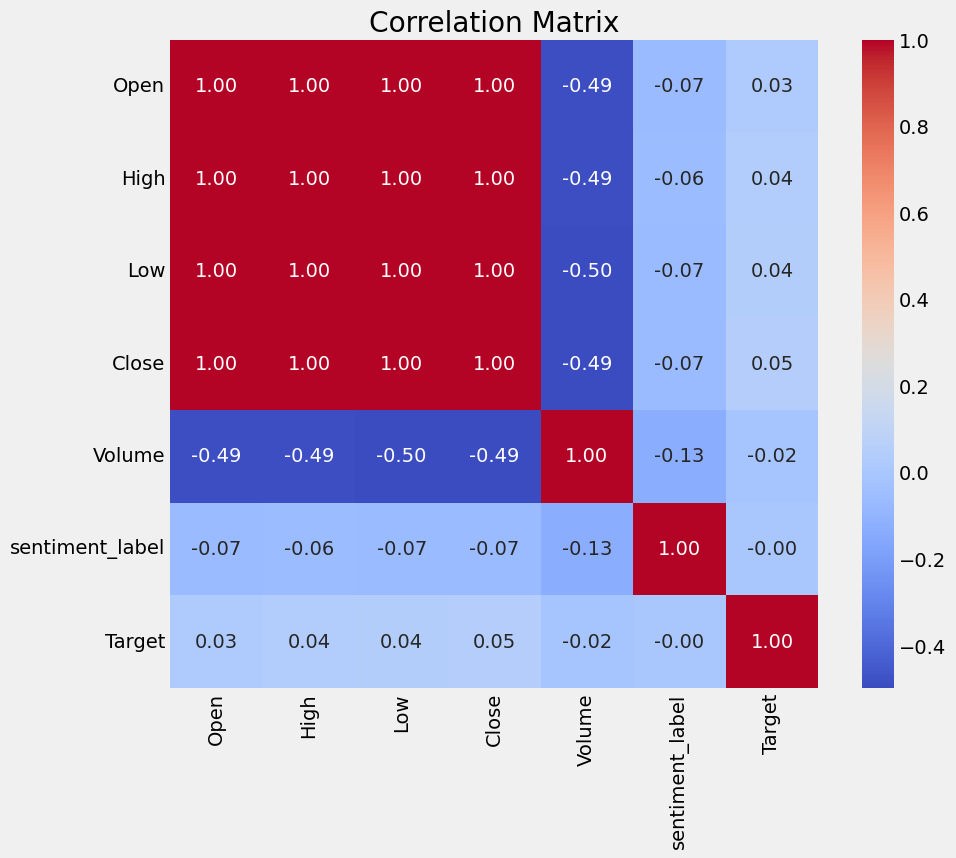

In [415]:
numerical_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'sentiment_label', 'Target']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix")
plt.show()

In [416]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    precision_score, recall_score, f1_score
)
from sklearn.utils import class_weight

df['Date'] = pd.to_datetime(df['Date'])

df['Target'] = (df['Close'] > df['Close'].shift(1)).astype(int)

df = df.dropna()

features = ['Open', 'High', 'Low', 'Close', 'Volume', 'sentiment_label']
X = df[features].values
y = df['Target'].values

n_timesteps = 10

split_index = 501
X_train_raw = X[:split_index]
X_test_raw = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

def create_sequences(features, target, timesteps):
    X_seq, y_seq = [], []
    for i in range(len(features) - timesteps):
        X_seq.append(features[i:i + timesteps])
        y_seq.append(target[i + timesteps])
    return np.array(X_seq), np.array(y_seq)

x_train, y_train_seq = create_sequences(X_train_scaled, y_train, n_timesteps)
x_test, y_test_seq = create_sequences(X_test_scaled, y_test, n_timesteps)

class_weights = class_weight.compute_class_weight(
    'balanced', classes=[0, 1], y=y_train_seq
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

def create_gru_model(input_shape):
    model = Sequential([
        GRU(units=64, return_sequences=True, input_shape=input_shape, activation='tanh'),
        Dropout(0.2),
        BatchNormalization(),
        GRU(units=32, return_sequences=False, activation='tanh'),
        Dropout(0.2),
        Dense(units=1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (x_train.shape[1], x_train.shape[2])
regressorGRU = create_gru_model(input_shape)

regressorGRU.fit(
    x_train, y_train_seq, 
    epochs=50, batch_size=64, 
    class_weight=class_weight_dict, verbose=0
)

all_predictions = []
for i in range(len(x_test)):
    x_test_sample = x_test[i].reshape(1, x_test.shape[1], x_test.shape[2])
    prediction = regressorGRU.predict(x_test_sample, verbose=0)[0, 0]
    all_predictions.append(1 if prediction >= 0.50 else 0)

all_predictions = np.array(all_predictions)
precision = precision_score(y_test_seq, all_predictions)
recall = recall_score(y_test_seq, all_predictions)
f1 = f1_score(y_test_seq, all_predictions)
accuracy = accuracy_score(y_test_seq, all_predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

print(confusion_matrix(y_test_seq, all_predictions))
print(classification_report(y_test_seq, all_predictions))


Precision: 0.57
Recall: 0.01
F1 Score: 0.02
Accuracy: 0.47
[[349   3]
 [391   4]]
              precision    recall  f1-score   support

           0       0.47      0.99      0.64       352
           1       0.57      0.01      0.02       395

    accuracy                           0.47       747
   macro avg       0.52      0.50      0.33       747
weighted avg       0.52      0.47      0.31       747



In [449]:
a = np.array([58.1, 56.2, 57.1, 56.0, 61.5, 56.6, 55.7, 56.4, 56.0, 56.1])
print(np.std(a))
print(np.mean(a))

1.6468454693747068
56.970000000000006
